# The very first Virtual Rat RNN

In [78]:
import numpy as np
import matplotlib.pyplot as plt

from RNN import FirstRNN
from VirtualRatFunctions import *
from RNN_solver import RNNsolver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

allRatsData = getData(3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded defaults from ~/.dbconf
Z009 (12771, 6)
A099 (23265, 6)
A109 (42333, 6)


In [79]:
preprocessedData = preProcess(allRatsData)

In [80]:
RNNs = {}
solvers = {}
choices = {}
probabilities = {}
accuracies = {}
for ratname in preprocessedData.keys():
    print ratname
    ratData = preprocessedData[ratname]
    RNN = FirstRNN(hidden_dim = 5)
    RNNs[ratname] = RNN
    solver = RNNsolver(RNN, ratData['trainX'], ratData['trainY'],optim_config={
                     'learning_rate': 1e-4,
                   }, num_epochs = 500,
                       verbose = True)
    solvers[ratname] = solver
    solver.train()
    choice, probs = RNN.predict(ratData['valX'])
    probabilities[ratname] = probs
    choices[ratname] = choice
    acc = np.mean(choice == ratData['valTrueY'])
    accuracies[ratname] = acc
    print acc

Z009
(Iteration 1 / 500) loss: 11348.827525
(Iteration 11 / 500) loss: 11126.416584
(Iteration 21 / 500) loss: 11012.391836
(Iteration 31 / 500) loss: 10866.109740
(Iteration 41 / 500) loss: 10641.447734
(Iteration 51 / 500) loss: 10315.347135
(Iteration 61 / 500) loss: 9962.145542
(Iteration 71 / 500) loss: 9685.063089
(Iteration 81 / 500) loss: 9525.984524
(Iteration 91 / 500) loss: 9448.301431
(Iteration 101 / 500) loss: 9409.298224
(Iteration 111 / 500) loss: 9388.085076
(Iteration 121 / 500) loss: 9375.568903
(Iteration 131 / 500) loss: 9367.634625
(Iteration 141 / 500) loss: 9362.293226
(Iteration 151 / 500) loss: 9358.512367
(Iteration 161 / 500) loss: 9355.718230
(Iteration 171 / 500) loss: 9353.572407
(Iteration 181 / 500) loss: 9351.865657
(Iteration 191 / 500) loss: 9350.463815
(Iteration 201 / 500) loss: 9349.278576
(Iteration 211 / 500) loss: 9348.258635
(Iteration 221 / 500) loss: 9347.829877
(Iteration 231 / 500) loss: 9374.983496
(Iteration 241 / 500) loss: 9382.468259


In [81]:
ratdata = preprocessedData['Z009']
valY = ratdata['valY']
valTrueY = ratdata['valTrueY']
correct = 0.0
count = 0.0
for i in xrange(valY.shape[1]):
    if valY[0,i] !=2:
        count += 1
        if valY[0,i] == valTrueY[0,i]:
            correct += 1
print correct/count

0.748451053284


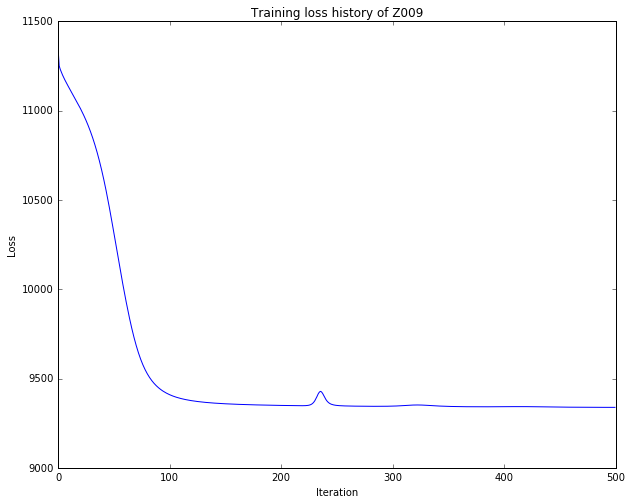

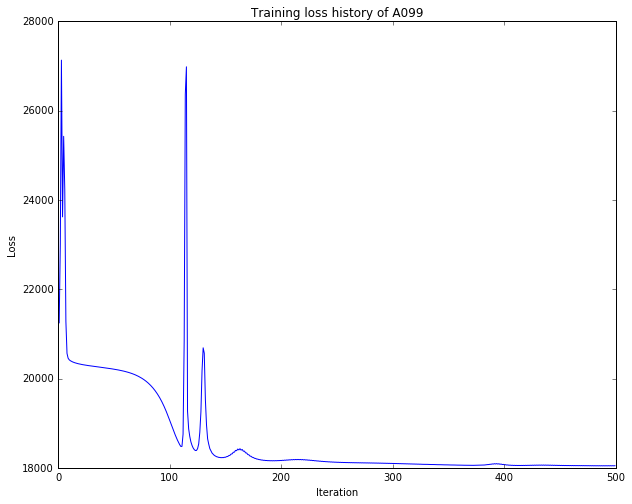

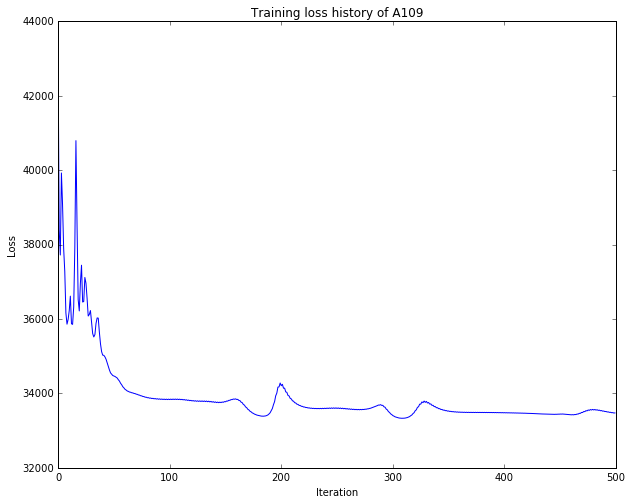

In [82]:
# Plot the training losses
for ratname in solvers.keys():
    plt.plot(solvers[ratname].loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history of '+ ratname)
    plt.show()

In [89]:
trial_window = 3
postData = postProcess(probabilities, preprocessedData,trial_window=trial_window)

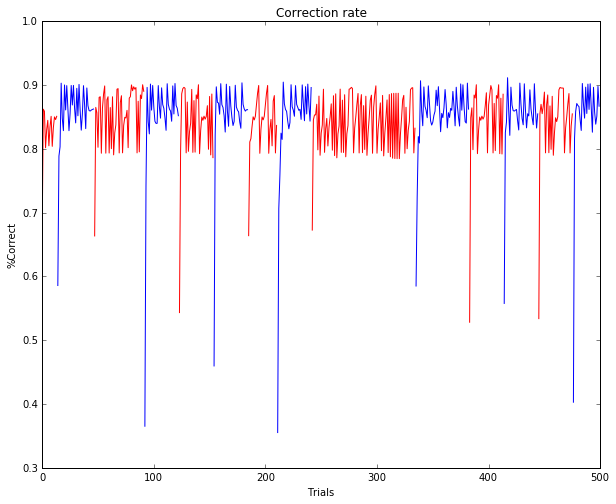

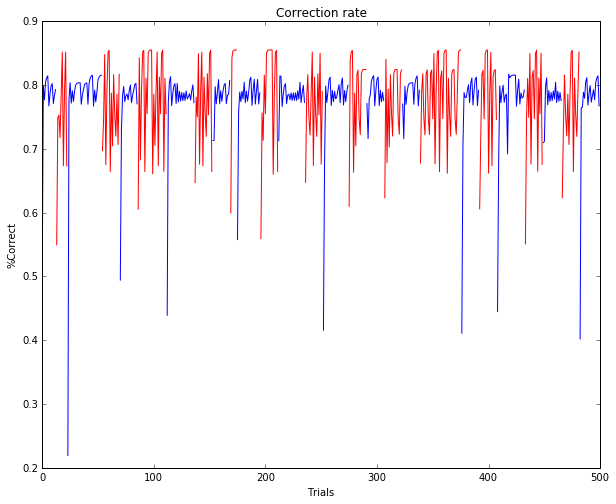

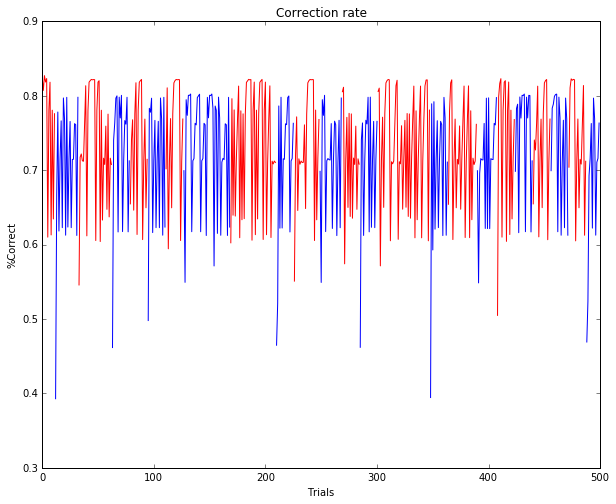

In [90]:
for ratname in postData:
    plt.plot(range(500), postData[ratname]['pro_prob'][:500],color='b')
    plt.plot(range(500), postData[ratname]['anti_prob'][:500],color='r')
    plt.xlabel('Trials')
    plt.ylabel('%Correct')
    plt.title('Correction rate')
    plt.show()

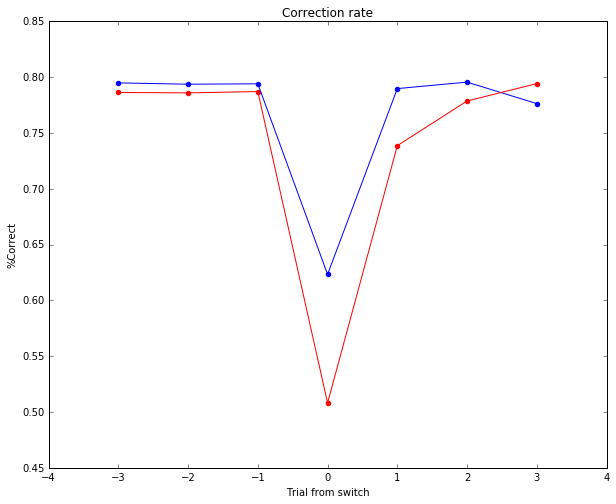

In [91]:
p2a, a2p = meanPerformance(postData)
plt.plot(range(-trial_window, trial_window+1), p2a,color='b')
plt.plot(range(-trial_window, trial_window+1), a2p,color='r')
plt.scatter(range(-trial_window, trial_window+1), p2a,color='b')
plt.scatter(range(-trial_window, trial_window+1), a2p,color='r')

plt.xlabel('Trial from switch')
plt.ylabel('%Correct')
plt.title('Correction rate')
plt.show()